In [31]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
!pip install lightgbm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import shap
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import seaborn as sns

In [34]:
virus_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country', 'Age', 'Health_Status', 'Archaeal', 'Bacteriophage', 'Eukaryotic', 'crassphage'], axis=1)

In [35]:
virus_df.head()

,Healthy,Ackermannviridae,Adenoviridae,Alphaflexiviridae,Anelloviridae,Asfarviridae,Astroviridae,Bicaudaviridae,Caliciviridae,Circoviridae,...,Poxviridae,Rudiviridae,Siphoviridae,Smacoviridae,Virgaviridae,Age_Child,Age_Adult,Age_Infant,Age_Elderly,Age_Mix
0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0
1,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0
2,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0
3,1.0,0.0,0.0,0.0,3.84,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.84,0.0,0.0,1,0,0,0,0
4,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0


In [36]:
virus_df.shape

(1726, 34)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 <a list of 34 Text major ticklabel objects>)

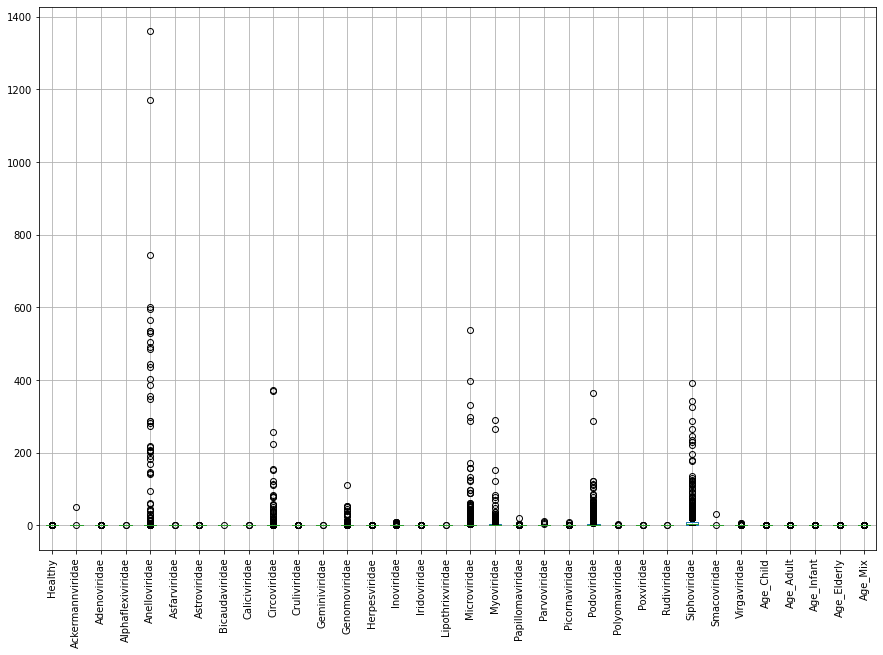

In [37]:
plt.figure(figsize=(15,10))
virus_df.boxplot()
plt.xticks(rotation=90)

In [38]:
from sklearn.preprocessing import StandardScaler

virus_list = virus_df.columns.to_list()[1:-5]
std_scaler = StandardScaler()
std_scaler.fit(virus_df[virus_list])
std_scaler = std_scaler.transform(virus_df[virus_list])
virus_list_std = [f"{x}_std" for x in virus_list]

virus_df[virus_list_std] = std_scaler
virus_df = virus_df.drop(virus_list, axis=1)
virus_df.head()

,Healthy,Age_Child,Age_Adult,Age_Infant,Age_Elderly,Age_Mix,Ackermannviridae_std,Adenoviridae_std,Alphaflexiviridae_std,Anelloviridae_std,...,Papillomaviridae_std,Parvoviridae_std,Picornaviridae_std,Podoviridae_std,Polyomaviridae_std,Poxviridae_std,Rudiviridae_std,Siphoviridae_std,Smacoviridae_std,Virgaviridae_std
0,1.0,1,0,0,0,0,-0.024288,-0.067623,-0.025881,-0.123518,...,-0.052826,-0.04307,-0.087688,-0.294769,-0.046608,-0.044254,-0.034057,-0.384049,-0.025344,-0.055371
1,1.0,1,0,0,0,0,-0.024288,-0.067623,-0.025881,-0.123518,...,-0.052826,-0.04307,-0.087688,-0.294769,-0.046608,-0.044254,-0.034057,-0.384049,-0.025344,-0.055371
2,1.0,1,0,0,0,0,-0.024288,-0.067623,-0.025881,-0.123518,...,-0.052826,-0.04307,-0.087688,0.236258,-0.046608,-0.044254,-0.034057,-0.384049,-0.025344,-0.055371
3,1.0,1,0,0,0,0,-0.024288,-0.067623,-0.025881,-0.067074,...,-0.052826,-0.04307,-0.087688,-0.044260,-0.046608,-0.044254,-0.034057,-0.234402,-0.025344,-0.055371
4,1.0,1,0,0,0,0,-0.024288,-0.067623,-0.025881,-0.123518,...,-0.052826,-0.04307,-0.087688,-0.294769,-0.046608,-0.044254,-0.034057,-0.384049,-0.025344,-0.055371


In [39]:
virus_df.describe()

,Healthy,Age_Child,Age_Adult,Age_Infant,Age_Elderly,Age_Mix,Ackermannviridae_std,Adenoviridae_std,Alphaflexiviridae_std,Anelloviridae_std,...,Papillomaviridae_std,Parvoviridae_std,Picornaviridae_std,Podoviridae_std,Polyomaviridae_std,Poxviridae_std,Rudiviridae_std,Siphoviridae_std,Smacoviridae_std,Virgaviridae_std
count,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,...,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03
mean,0.775203,0.077636,0.796640,0.050985,0.038239,0.036501,1.646681e-17,2.058351e-17,4.116702e-18,-4.940042e-17,...,-8.233404e-18,8.233404e-18,1.646681e-17,8.233404e-18,4.631290e-18,-8.233404e-18,-1.440846e-17,-2.881691e-17,-4.116702e-18,1.235011e-17
std,0.417570,0.267676,0.402615,0.220031,0.191828,0.187586,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,...,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.428758e-02,-6.762265e-02,-2.588064e-02,-1.235180e-01,...,-5.282563e-02,-4.306976e-02,-8.768822e-02,-2.947693e-01,-4.660781e-02,-4.425436e-02,-3.405700e-02,-3.840487e-01,-2.534439e-02,-5.537114e-02
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.428758e-02,-6.762265e-02,-2.588064e-02,-1.235180e-01,...,-5.282563e-02,-4.306976e-02,-8.768822e-02,-2.816241e-01,-4.660781e-02,-4.425436e-02,-3.405700e-02,-3.228652e-01,-2.534439e-02,-5.537114e-02
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.428758e-02,-6.762265e-02,-2.588064e-02,-1.235180e-01,...,-5.282563e-02,-4.306976e-02,-8.768822e-02,-2.239874e-01,-4.660781e-02,-4.425436e-02,-3.405700e-02,-1.934836e-01,-2.534439e-02,-5.537114e-02
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.428758e-02,-6.762265e-02,-2.588064e-02,-1.235180e-01,...,-5.282563e-02,-4.306976e-02,-8.768822e-02,-7.492137e-02,-4.660781e-02,-4.425436e-02,-3.405700e-02,-4.305804e-02,-2.534439e-02,-5.537114e-02
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.153152e+01,2.330587e+01,4.140692e+01,1.986700e+01,...,3.883247e+01,3.200370e+01,3.014120e+01,2.351665e+01,3.003807e+01,2.757319e+01,2.975566e+01,1.493130e+01,4.147238e+01,2.744175e+01


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 <a list of 34 Text major ticklabel objects>)

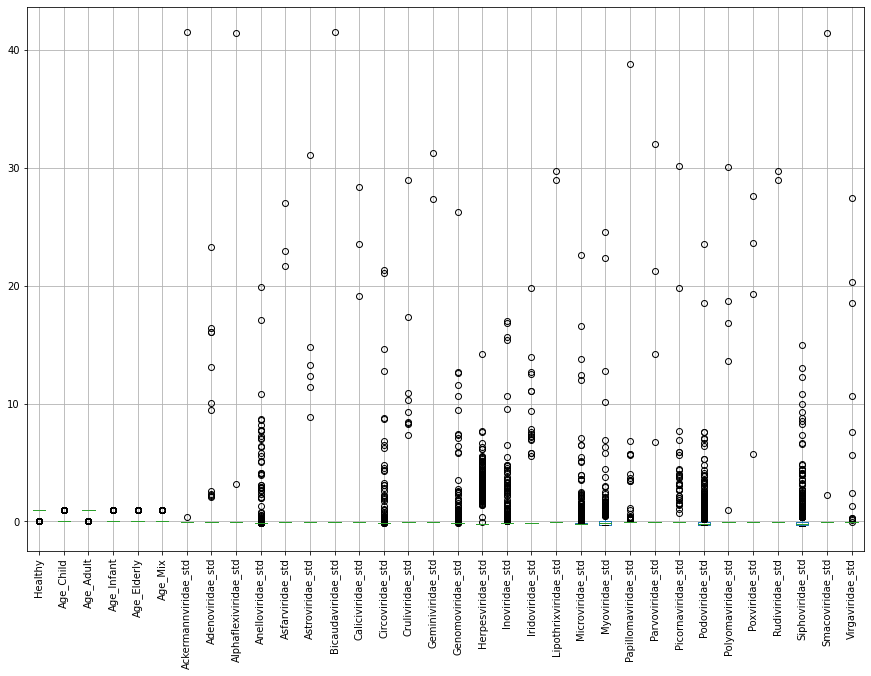

In [40]:
plt.figure(figsize=(15,10))
virus_df.boxplot()
plt.xticks(rotation=90)

In [41]:
virus_df.to_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_std.csv')

In [ ]:
target = 'Healthy'

X = virus_df.loc[:,virus_df.columns!=target]
y = virus_df.loc[:,virus_df.columns==target]

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_jobs=-1, random_state=123)

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

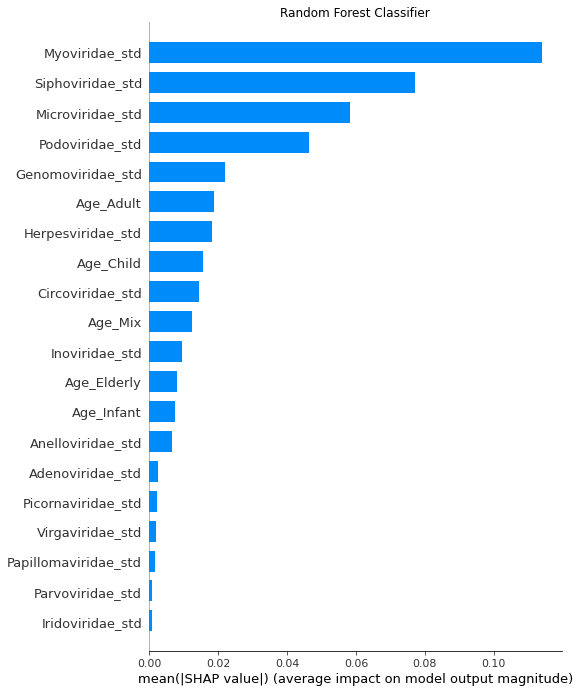

In [ ]:
shap.summary_plot(shap_values[1], X_test, plot_type="bar", show=False)
plt.title("Random Forest Classifier")
plt.show()

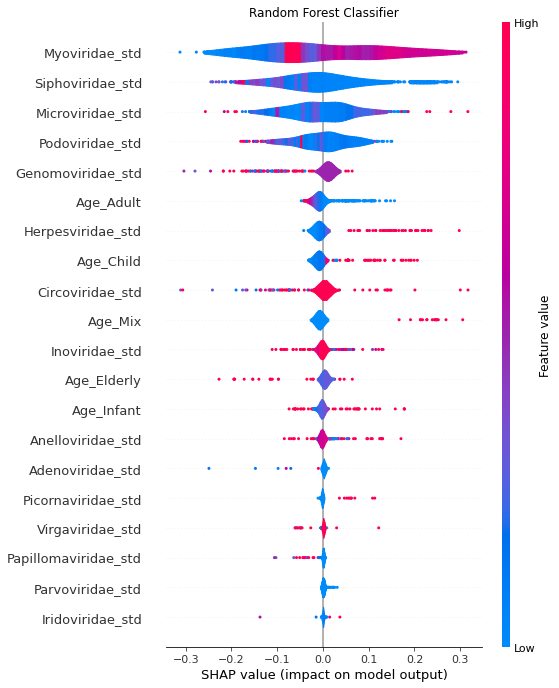

In [ ]:
shap.summary_plot(shap_values[1], X_test, plot_type='violin', show=False)
plt.title("Random Forest Classifier")
plt.show()

In [ ]:
y_predicted = rf.predict(X_test)

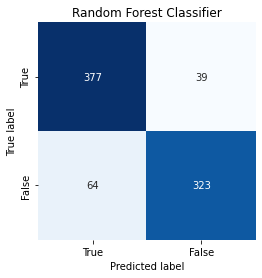

In [ ]:
mat = confusion_matrix(y_test, y_predicted)
labels = ['True', 'False']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Random Forest Classifier")
plt.show()

In [ ]:
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)

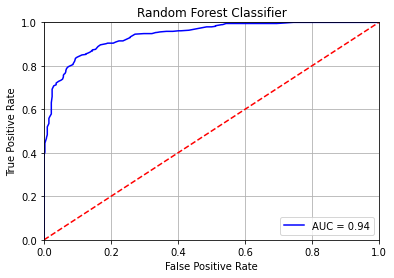

In [ ]:
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Random Forest Classifier")
plt.show()

In [ ]:
# Display accuracy score
accuracy=accuracy_score(y_test, y_predicted)
# Display F1 score
f1=f1_score(y_test,y_predicted)

print(f'Accuracy = {accuracy}, F1 = {f1}')

Accuracy = 0.8717310087173101, F1 = 0.8624833110814419


extra tree

In [ ]:
et = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                                  criterion='gini', max_depth=None, max_features='auto',
                                  max_leaf_nodes=None, max_samples=None,
                                  min_impurity_decrease=0.0,
                                  min_samples_leaf=1, min_samples_split=2,
                                  min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                                  oob_score=False, random_state=123, verbose=0,
                                  warm_start=False)

In [ ]:
et.fit(X_train, y_train.values.ravel())

ExtraTreesClassifier(n_jobs=-1, random_state=123)

In [ ]:
explainer = shap.TreeExplainer(et)
shap_values = explainer.shap_values(X_test)

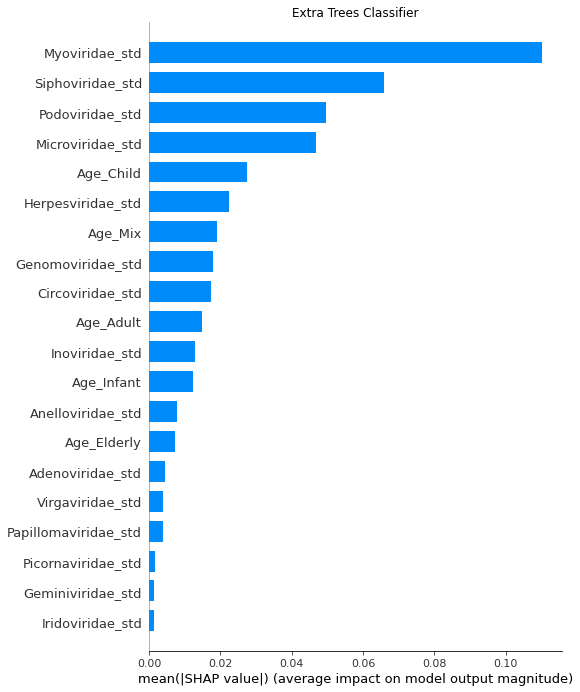

In [ ]:
shap.summary_plot(shap_values[1], X_test, plot_type="bar", show=False)
plt.title("Extra Trees Classifier")
plt.show()

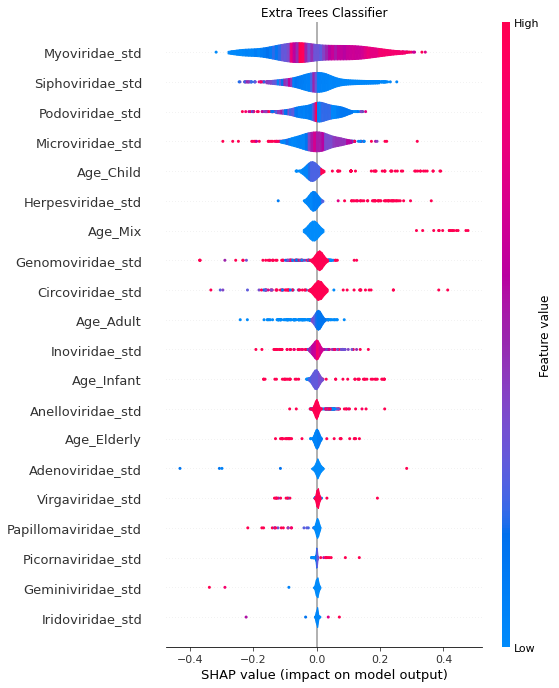

In [ ]:
shap.summary_plot(shap_values[1], X_test, plot_type='violin', show=False)
plt.title("Extra Trees Classifier")
plt.show()

In [ ]:
y_predicted = et.predict(X_test)

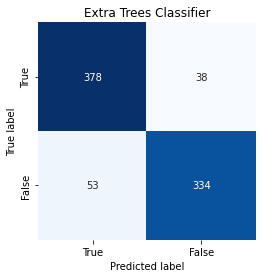

In [ ]:
mat = confusion_matrix(y_test, y_predicted)
labels = ['True', 'False']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Extra Trees Classifier")
plt.show()

In [ ]:
probs = et.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)

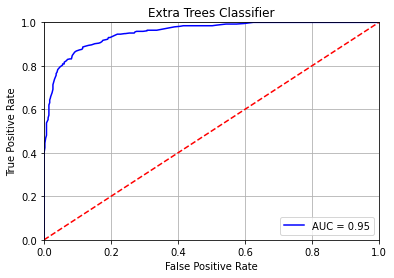

In [ ]:
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Extra Trees Classifier")
plt.show()

In [ ]:
# Display accuracy score
accuracy=accuracy_score(y_test, y_predicted)
# Display F1 score
f1=f1_score(y_test,y_predicted)

print(f'Accuracy = {accuracy}, F1 = {f1}')

Accuracy = 0.8866749688667497, F1 = 0.8801054018445322


lightgbm 

In [ ]:
lightgbm = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                              importance_type='split', learning_rate=0.1, max_depth=-1,
                              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lightgbm.fit(X_train, y_train.values.ravel())

LGBMClassifier(random_state=123, silent='warn')

In [ ]:
explainer = shap.TreeExplainer(lightgbm)
shap_values = explainer.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


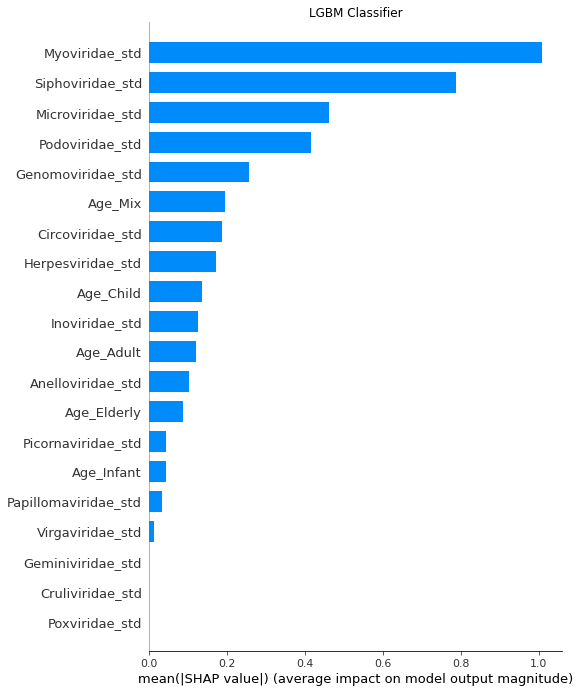

In [ ]:
shap.summary_plot(shap_values[1], X_test, plot_type="bar", show=False)
plt.title("LGBM Classifier")
plt.show()

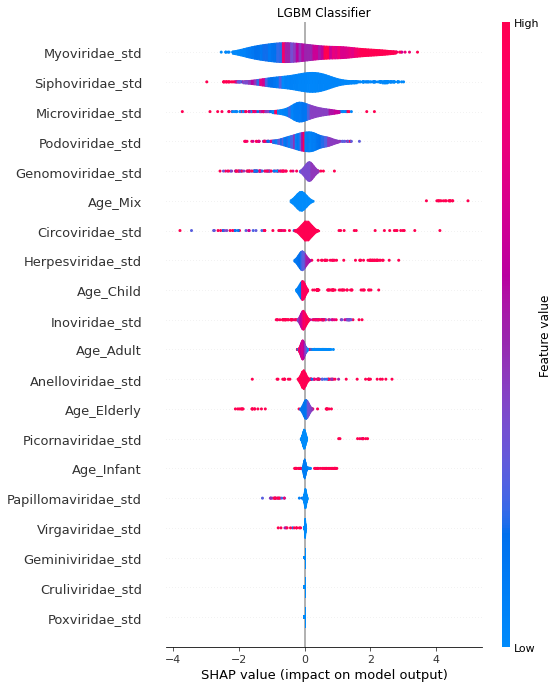

In [ ]:
shap.summary_plot(shap_values[1], X_test, plot_type='violin', show=False)
plt.title("LGBM Classifier")
plt.show()

In [ ]:
y_predicted = lightgbm.predict(X_test)

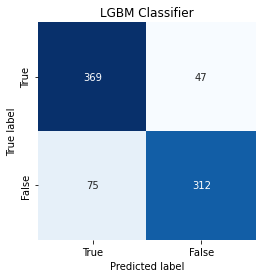

In [ ]:
mat = confusion_matrix(y_test, y_predicted)
labels = ['True', 'False']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("LGBM Classifier")
plt.show()

In [ ]:
probs = lightgbm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)

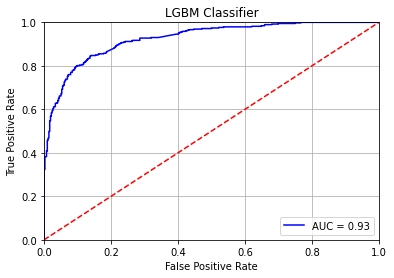

In [ ]:
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("LGBM Classifier")
plt.show()

In [ ]:
# Display accuracy score
accuracy=accuracy_score(y_test, y_predicted)
# Display F1 score
f1=f1_score(y_test,y_predicted)

print(f'Accuracy = {accuracy}, F1 = {f1}')

Accuracy = 0.8480697384806973, F1 = 0.8364611260053619


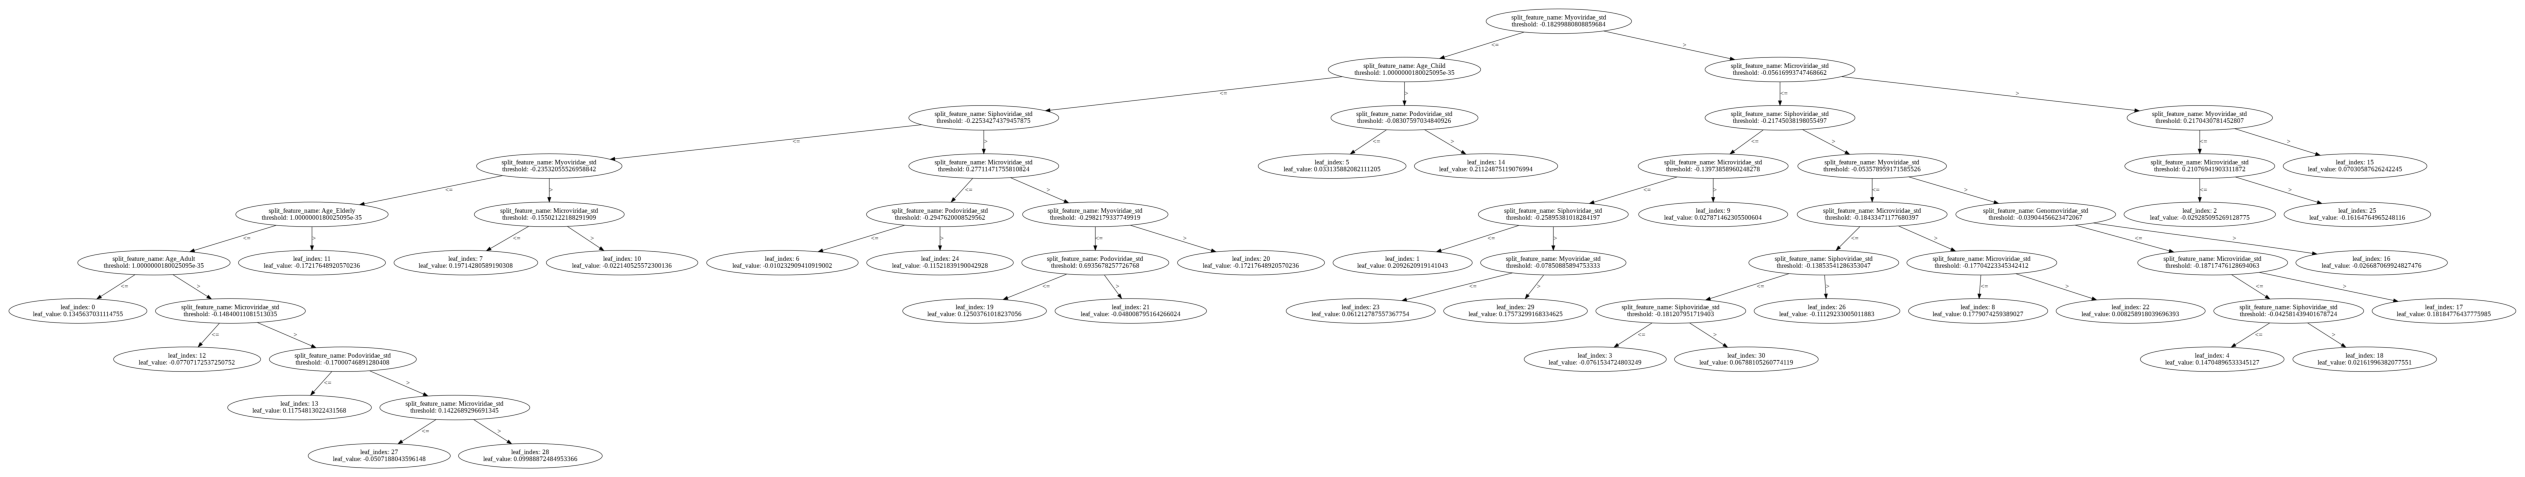

In [ ]:
lgb.plot_tree(lightgbm,figsize=(45,30))